 ## Classes

Classes provide a means of bundling data and functionality together. Creating a new class creates a <i>new type</i> of object, allowing <i>new instances</i> of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state. 

We already know examples of classes - <i>list, tuple, dictionary</i>, etc. 

The simplest form of class definition looks like this: 

 <pre><span></span><span class="k">class</span> <span class="nc">ClassName</span><span class="p">:</span>
    <span class="o">&lt;</span><span class="n">statement</span><span class="o">-</span><span class="mi">1</span><span class="o">&gt;</span>
    <span class="o">.</span>
    <span class="o">.</span>
    <span class="o">.</span>
    <span class="o">&lt;</span><span class="n">statement</span><span class="o">-</span><span class="n">N</span><span class="o">&gt;</span>
</pre>

In practice, the statements inside a class definition will usually be function definitions, but other statements are allowed, and sometimes useful — we’ll come back to this later. The function definitions inside a class normally have a peculiar form of argument list, dictated by the calling conventions for methods — again, this is explained later.

When a class definition is entered, a new namespace is created, and used as the local scope — thus, all assignments to local variables go into this new namespace. In particular, function definitions bind the name of the new function here. 

### Class Objects

 Class objects support two kinds of operations: attribute references and instantiation.
 
 <i>Attribute references</i> used as <i> obj.name </i> and let you get reference of some object defined on class. Valid attribute names are all the names that were in the class’s namespace when the class object was created.

In [1]:
class MyClass:
    def f(self):
        return 'hello class'

 Now MyClass.f is a valide attribute reference to function f. It is also possible to assign value to attribute references (I do not recommend this).

In [2]:
MyClass.f

<function __main__.MyClass.f(self)>

 Class <i>instantiation</i> uses function notation. Just pretend that the class object is a parameterless function that returns a new <i>instance</i> of the class.

In [3]:
MyClass()

 Now we can assigen out class instance to any variable

In [4]:
x = MyClass()

 To customize instantiation of class object <b>\__init\__()</b> function is used. So we can write our class with <b>\__init__()</b> function

In [5]:
class MyClass:
    def __init__(self):
        self.i = 42
    
    def f(self):
        return 'hello class'

After instantiation we can refer to it's attributes 

In [6]:
x = MyClass()
x.i, x.f

(42, <bound method MyClass.f of <__main__.MyClass object at 0x7fd72c1cd780>>)

  There are two kinds of valid attribute names, data attributes and methods

 Data attributes are like variables on instance objects. Data attributes need not be declared; like local variables, they spring into existence when they are first assigned to

In [8]:
x.counter = 1
while x.counter < 10:
    x.counter = x.counter * 2
print(x.counter)
del x.counter

16


 A method is a function that “belongs to” an object. Valid method names of an instance object depend on its class. By definition, all attributes of a class that are function objects define corresponding methods of its instances. So in our example, <i>x.f</i> is a valid method reference, since <i>MyClass.f</i> is a function, but <i>x.i</i> is not, since <i>MyClass.i</i> is not. But <i>x.f</i> is not the same thing as <i>MyClass.f</i> — it is a <i>method object</i>, not a function object.

### Method Objects 

 Usually, a method is called right after it is bound:

In [9]:
x.f()

'hello class'

In [10]:
xf = x.f
for _ in range(5):
    print(xf())

hello class
hello class
hello class
hello class
hello class


 What exactly happens when a method is called? The special thing about methods is that the instance object is passed as the first argument of the function. In our example, the call <i>x.f()</i> is exactly equivalent to <i>MyClass.f(x)</i>

 When an instance attribute is referenced that isn’t a data attribute, its class is searched. If the name denotes a valid class attribute that is a function object, a method object is created by packing (pointers to) the instance object and the function object just found together in an abstract object: this is the method object. When the method object is called with an argument list, a new argument list is constructed from the instance object and the argument list, and the function object is called with this new argument list. 

### Class and Instance Variables

 Generally speaking, instance variables are for data unique to each instance and class variables are for attributes and methods shared by all instances of the class

In [11]:
class Dog:

    kind = 'canine'         # class variable shared by all instances

    def __init__(self, name):
        self.name = name    # instance variable unique to each instance

d = Dog('Fido')
e = Dog('Buddy')

In [12]:
d.kind

'canine'

In [13]:
e.kind

'canine'

In [14]:
d.name

'Fido'

In [15]:
e.name

'Buddy'

 If class variable is a mutable it accidentally can be changed by all instances of the class.

In [16]:
class Dog:

    tricks = []             # mistaken use of a class variable

    def __init__(self, name):
        self.name = name

    def add_trick(self, trick):
        self.tricks.append(trick)

d = Dog('Fido')
e = Dog('Buddy')

In [17]:
d.add_trick('roll over')
e.add_trick('play dead')
d.tricks 

['roll over', 'play dead']

 Correct design of the class should use an instance variable instead:

In [18]:
class Dog:

    def __init__(self, name):
        self.name = name
        self.tricks = []    # creates a new empty list for each dog

    def add_trick(self, trick):
        self.tricks.append(trick)
d = Dog('Fido')
e = Dog('Buddy')

In [19]:
d.add_trick('roll over')
e.add_trick('play dead')

In [20]:
e.tricks

['play dead']

In [21]:
d.tricks

['roll over']

 <b>Static Methods</b>: static method can neither modify object state nor class state. Static methods are restricted in what data they can access - and they’re primarily a way to namespace your methods.

In [22]:
class Dog:

    def __init__(self, name):
        self.name = name
        self.tricks = []
        
    @staticmethod
    def woof():
        print("woof")

    def add_trick(self, trick):
        self.tricks.append(trick)
        
d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')

In [23]:
Dog.woof()

woof


In [24]:
d.woof()
e.woof()

woof
woof


## Inheritance

 Inheritance is when an object or class is based on another object (prototypal inheritance) or class (class-based inheritance), using the same implementation. An inherited class is called a subclass of its parent class or super class.

 <pre><span></span><span class="k">class</span> <span class="nc">DerivedClassName</span><span class="p">(</span><span class="n">BaseClassName</span><span class="p">):</span>
    <span class="o">&lt;</span><span class="n">statement</span><span class="o">-</span><span class="mi">1</span><span class="o">&gt;</span>
    <span class="o">.</span>
    <span class="o">.</span>
    <span class="o">.</span>
    <span class="o">&lt;</span><span class="n">statement</span><span class="o">-</span><span class="n">N</span><span class="o">&gt;</span>
</pre>

 Execution of a derived class definition proceeds the same as for a base class. When the class object is constructed, the base class is remembered. This is used for resolving attribute references: if a requested attribute is not found in the class, the search proceeds to look in the base class. This rule is applied recursively if the base class itself is derived from some other class.

In [ ]:
class BaseClass:
    def f_base(self):
        print("I'm base class method")
        
class DerivedClass(BaseClass):
    def f_derived(self):
        print("I'm derived class method")

In [ ]:
x = BaseClass()
x.f_base()

In [ ]:
x.f_derived()

In [ ]:
y = DerivedClass()
y.f_derived()

In [ ]:
y.f_base()

In [ ]:
class DerivedFromDerivedClass(DerivedClass):
    def f_derived_derived(self):
        print("I'm derived from derived class")

In [ ]:
z = DerivedFromDerivedClass()

In [ ]:
z.f_derived_derived()

In [ ]:
z.f_derived()

In [ ]:
z.f_base()

 Python has two built-in functions that work with inheritance: <b> isinstance </b> and <b> issubclass </b>

 <i>isinstance(object, class)</i> checks if object of instance of class or class which is derived from given class

In [ ]:
isinstance(x, BaseClass)

In [ ]:
isinstance(x, DerivedClass)

In [ ]:
isinstance(y, DerivedClass)

In [ ]:
isinstance(y, BaseClass)

 <i>issubclass(class1, class2)</i> checks if class1 is subclass of class2

In [ ]:
issubclass(DerivedClass, BaseClass)

In [ ]:
issubclass(BaseClass, DerivedClass)

In [ ]:
issubclass(DerivedFromDerivedClass, BaseClass)

Python supports a form of multiple inheritance as well. A class definition with multiple base classes looks like this: 

 <pre><span></span><span class="k">class</span> <span class="nc">DerivedClassName</span><span class="p">(</span><span class="n">Base1</span><span class="p">,</span> <span class="n">Base2</span><span class="p">,</span> <span class="n">Base3</span><span class="p">):</span>
    <span class="o">&lt;</span><span class="n">statement</span><span class="o">-</span><span class="mi">1</span><span class="o">&gt;</span>
    <span class="o">.</span>
    <span class="o">.</span>
    <span class="o">.</span>
    <span class="o">&lt;</span><span class="n">statement</span><span class="o">-</span><span class="n">N</span><span class="o">&gt;</span>
</pre>

For most purposes, in the simplest cases, you can think of the search for attributes inherited from a parent class as depth-first, left-to-right, not searching twice in the same class where there is an overlap in the hierarchy. Thus, if an attribute is not found in DerivedClassName, it is searched for in Base1, then (recursively) in the base classes of Base1, and if it was not found there, it was searched for in Base2, and so on. 

### Encapsulation

 “Private” instance variables that cannot be accessed except from inside an object don’t exist in Python. However, there is a convention that is followed by most Python code: a name prefixed with an underscore (e.g. _spam) should be treated as a non-public part of the API (whether it is a function, a method or a data member). 

Since there is a valid use-case for class-private members (namely to avoid name clashes of names with names defined by subclasses), there is limited support for such a mechanism, called name mangling. Any identifier of the form \__spam (at least two leading underscores, at most one trailing underscore) is textually replaced with _classname__spam, where classname is the current class name with leading underscore(s) stripped. This mangling is done without regard to the syntactic position of the identifier, as long as it occurs within the definition of a class. 

In [ ]:
class Mapping:
    def __init__(self, iterable):
        self.items_list = []
        self.__update(iterable)

    def update(self, iterable):
        for item in iterable:
            self.items_list.append(item)

    __update = update   # private copy of original update() method

class MappingSubclass(Mapping):

    def update(self, keys, values):
        # provides new signature for update()
        # but does not break __init__()
        for item in zip(keys, values):
            self.items_list.append(item)

In [ ]:
x = MappingSubclass([])

In [ ]:
x._Mapping__update

## Polymorphism 

 Polymorphism is the provision of a single interface to entities of different types. Polymorphism doesn't exist in Python. It is just an effect of how class method is found.

 If medoths have the same name derived classes may override methods of their base classes. Because methods have no special privileges when calling other methods of the same object, a method of a base class that calls another method defined in the same base class may end up calling a method of a derived class that overrides it

 An overriding method in a derived class may in fact want to extend rather than simply replace the base class method of the same name. There is a simple way to call the base class method directly: just call <i>BaseClassName.methodname(self, arguments)</i>

In [ ]:
class Shape():
    def draw(self):
        print("Shape")

class Line(Shape):
    def draw(self):
        print("Line")
        
class Circle(Line):
    def draw(self):
        print("Circle")
        
class Square(Line):
    def draw(self):
        print("Square")

In [ ]:
shape = Square()

In [ ]:
shape.draw()

In [ ]:
shape = Circle()
shape.draw()

 If we just want to extend base class method instead of replacing it, we can use <i>super()</i> method

In [ ]:
class Triangle(Line):
    def draw(self):
        super().draw()
        print("Triangle")

In [ ]:
shape = Triangle()

In [ ]:
shape.draw()

In [ ]:
class BaseClass():
    def a(self):
        print("base a")
        self.b()
        
    def b(self):
        print("base b")

class DerivedClass(BaseClass):
    def b(self):
        print("derived b")

In [ ]:
x = BaseClass()
x.a()

In [ ]:
y = DerivedClass()
y.a()

 ### Generators

In [58]:
import random

class DataGenerator:
    def __init__(self, fun, max_points=50):
        self.fun = fun
        self.max_points = max_points
        self.num_points = 0
        
    def __iter__(self):
        self.num_points = 0
        return self
        
    def __next__(self):
        if self.num_points > self.max_points:
            raise StopIteration
        
        self.num_points += 1
        rp = random.uniform(100, 1000)
        return rp, self.fun(rp)

In [59]:
generator = DataGenerator(lambda x: 5 * x + 3)

In [60]:
points = [point for point in generator]
points[:10]

[(865.370050482805, 4329.850252414025),
 (943.751312639013, 4721.756563195065),
 (466.56088186363957, 2335.804409318198),
 (698.7567911948606, 3496.7839559743034),
 (431.6716651202105, 2161.3583256010525),
 (248.51240916383662, 1245.5620458191831),
 (461.2776310497963, 2309.3881552489815),
 (794.399924921094, 3974.9996246054698),
 (311.4034982603602, 1560.017491301801),
 (851.3687304706466, 4259.843652353233)]

In [61]:
import matplotlib.pyplot as plt

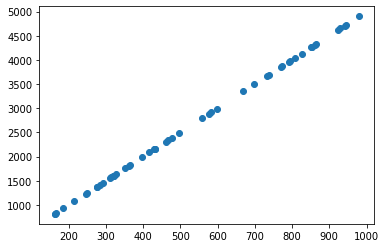

In [62]:
x, y = zip(*points)
plt.scatter(x, y)
plt.show()

Let's add some noise to our generated data

In [63]:
class DataGenerator:
    def __init__(self, fun, std=100, max_points=50):
        self.fun = fun
        self.max_points = max_points
        self.num_points = 0
        self.std = std
        
    def __iter__(self):
        self.num_points = 0
        return self
        
    def __next__(self):
        if self.num_points > self.max_points:
            raise StopIteration
        
        self.num_points += 1
        rp = random.uniform(100, 1000)
        noise = random.gauss(0, self.std)
        return rp, self.fun(rp) + noise

In [65]:
generator = DataGenerator(lambda x: 5 * x + 3, std=200)

In [66]:
points = [point for point in generator]

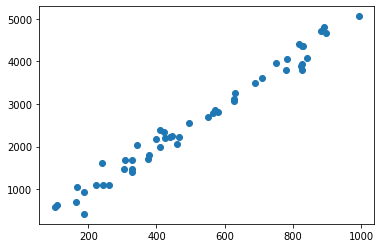

In [67]:
x, y = zip(*points)
plt.scatter(x, y)
plt.show()

 #### Generator functions

In [69]:
def data_generator(fun, max_points=50, std=100):
    n = 0
    while n < max_points:
        rp = random.uniform(100, 1000)
        noise = random.gauss(0, std)
        yield rp, fun(rp) + noise
        n += 1

In [70]:
points = [point for point in data_generator(lambda x: 5 * x + 3, std=200)]

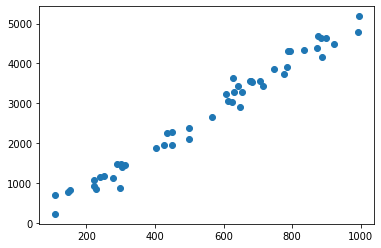

In [71]:
x, y = zip(*points)
plt.scatter(x, y)
plt.show()

<b> Generators </b> are memory efficient. A normal function to return a sequence will create the entire sequence in memory before returning the result. This is an overkill if the number of items in the sequence is very large.

Generator implementation of such sequence is memory friendly and is preferred since it only produces one item at a time. 

In [72]:
def even_numbers():
    n = 0
    while True:
        yield n
        n += 2

In [73]:
even = even_numbers()
even

<generator object even_numbers at 0x7fd701d47b10>

In [74]:
next(even)

0

In [75]:
next(even), next(even), next(even)

(2, 4, 6)

In [76]:
all_even = (elem for elem in even)

In [77]:
multiple_of_three = (elem for elem in all_even if elem % 3 == 0)

In [78]:
n = 0
for elem in multiple_of_three:
    print(elem)
    n += 1
    if n == 10:
        break

12
18
24
30
36
42
48
54
60
66


#### Misc 

In [53]:
class Instrument:
    def __init__(self, name, symbol):
        self.name = name
        self.symbol = symbol
        
    def __rmul__(self, qty):
        return Quantity(self, qty)

class Quantity:
    def __init__(self, instrument, quantity):
        self.instrument = instrument
        self.quantity = quantity
        
    def __str__(self):
        return str(self.quantity) + self.instrument.symbol
    
class Wallet:
    def __init__(self, *args):
        self.data = []
        for d in args:
            self.data.append(d)
            
    def __str__(self):
        return ','.join([str(d) for d in self.data])

In [54]:
USD = Instrument('USD', '$')
AMD = Instrument('AMD', 'դ')

In [55]:
wallet = Wallet(1000 * USD, 250 * AMD)

In [56]:
print(wallet)

1000$,250դ


Reference: <br> https://docs.python.org/3/tutorial/classes.html 